# Predicting School Failure in the UK with scikit-learn
Data taken from [Ofsted](https://reports.ofsted.gov.uk/)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import re
# Get all most recent closed files
patterns = ["enqiures uk", "the", "learning", "staff", "good", "ir", "inspection", "the", "schools", "children", "pupils", "school", "pupil", "Ofsted", "Inspection report", "gov uk", "ofsted gov", "early year", "uk government", "www.ofsted.gov.uk", "www.gov.uk/ofsted", "Early Year", "ofsted", "gov", "Inspection Report"] # filter out common words
closed_school_names = []
closed = []
closed_root = './schools/closed/'
for path, subdirs, files in os.walk(closed_root):
  for s in subdirs:
    f = os.path.join(path,s)
    for p2, s2, f2 in os.walk(f):
      most_recent = [int(f.replace(".txt","")) for f in f2 if f != ' ']
      if most_recent:
        doc = max(most_recent)
        txt = open(os.path.join(p2,str(doc)+'.txt'), "r")
        content = txt.read()
        if re.search("Childminder Report", content):
          continue
        content = content.replace('\n','')
        for pattern in patterns:
          content = content.replace(pattern, '') 
        if content == '':
          continue
        closed_school_names.append(s)
        closed.append(content)

In [3]:
# Get all most recent open files
patterns = ["enqiures uk", "the", "learning", "staff", "good", "ir", "inspection", "the", "schools", "children", "pupils", "school", "pupil", "Ofsted", "Inspection report", "gov uk", "ofsted gov", "early year", "uk government", "www.ofsted.gov.uk", "www.gov.uk/ofsted", "Early Year", "ofsted", "gov", "Inspection Report"] # filter out common words
opened = []
open_school_names = []
open_root = './schools/open/'
for path, subdirs, files in os.walk(open_root):
  for s in subdirs:
    f = os.path.join(path,s)
    for p2, s2, f2 in os.walk(f):
      most_recent = [int(f.replace(".txt","")) for f in f2 if f != ' ']
      if most_recent:
        doc = max(most_recent)
        content = txt.read()
        txt = open(os.path.join(p2,str(doc)+'.txt'), "r")
        if re.search("Childminder Report", content):
          continue
        if re.search("Childminder", content):
          continue
        content = content.replace('\n','')
        for pattern in patterns:
          content = content.replace(pattern, '')
        if content == '':
          continue
        open_school_names.append(s)
        opened.append(content)

In [4]:
import pandas as pd
df_closed = pd.DataFrame()
closed_labels = ["closed" for school in closed]
df_closed["school"] = closed_school_names
df_closed["text"] = closed
df_closed["label"] = closed_labels

In [5]:
df_closed.head()

,school,text,label
0,Tweeddale Primary School,School report Tweeddale Primary School T...,closed
1,Loganberries Childcare And Tutoring Closed,Loganberries Childcare And Tutoring Hol...,closed
2,Dovedale Before and After School Club Closed,Dovedale Before and After School Club D...,closed
3,Pepe & Friends,"Pepe & Friends16 Skylines Village, Limeharbour...",closed
4,Cottonstones Pre-School Playgroup Closed,DAY CARE INSPECTION REPORTURN 303724INSPECTION...,closed


In [6]:
# Filter out schools that were marked as closed due to academy conversion
import numpy as np
df_closed = df_closed.replace(np.nan, '', regex=True)
df_closed = df_closed[~df_closed.text.apply(lambda x: bool(re.search("academy converters",x,re.IGNORECASE)))]

In [7]:
df_open = pd.DataFrame()
open_labels = ["open" for school in opened]
df_open["school"] = open_school_names
df_open["text"] = opened
df_open["label"] = open_labels

In [8]:
df_open.head()

,school,text,label
0,URN: EY417621,School report Tweeddale Primary School T...,open
1,Magpies West,Piccadilly Gate Store Street Manchester M1 2...,open
2,"St John's Church of England Primary School, La...",Magpies West West Kidlington Primary Sc...,open
3,Stoneydelph Primary School,Existing academy: St John's Church of Engla...,open
4,Pepe & Friends,Existing academy: Stoneydelph Primary SchoolUR...,open


In [9]:
df = df_closed.append(df_open, ignore_index=True)
df.label.unique()

array(['closed', 'open'], dtype=object)

In [10]:
df.head()

,school,text,label
0,Tweeddale Primary School,School report Tweeddale Primary School T...,closed
1,Loganberries Childcare And Tutoring Closed,Loganberries Childcare And Tutoring Hol...,closed
2,Dovedale Before and After School Club Closed,Dovedale Before and After School Club D...,closed
3,Pepe & Friends,"Pepe & Friends16 Skylines Village, Limeharbour...",closed
4,Cottonstones Pre-School Playgroup Closed,DAY CARE INSPECTION REPORTURN 303724INSPECTION...,closed


In [11]:
print ("Total number of closed schools: {}".format(len(closed)))
print ("Total number of open schools: {}".format(len(opened)))

Total number of closed schools: 43307
Total number of open schools: 49354


In [12]:
print ("Closed schools after filtering for academy converters: {}".format(len(df_closed))) # 530 after filtering out academy converter
print ("Open schools: {}".format(len(df_open)))

Closed schools after filtering for academy converters: 42437
Open schools: 49354


In [13]:
!pip install wordcloud

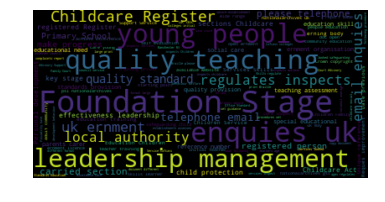

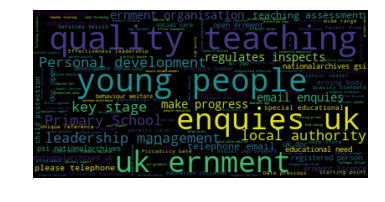

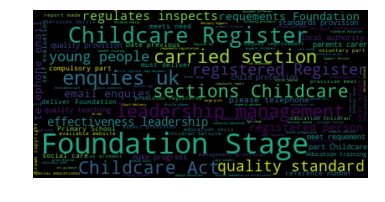

In [14]:
from wordcloud import WordCloud
import PIL
import itertools
import matplotlib.pyplot as plt

targets = ['text']

l1 = df_closed['text'].values.tolist()
l2 = df_open['text'].values.tolist()
school_categories = [l1, l2]

for schools,target in zip(school_categories, targets):
  raw_str = df[target].str.cat(sep=',')
  wordcloud = WordCloud( max_words=1000,margin=0).generate(raw_str)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

for o_schools,target in zip(l2, targets):
  raw_str = df_open[target].str.cat(sep=',')
  wordcloud = WordCloud(max_words=1000,margin=0).generate(raw_str)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

for c_schools,target in zip(l1, targets):
  raw_str = df_closed[target].str.cat(sep=',')
  wordcloud = WordCloud(max_words=1000,margin=0).generate(raw_str)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [15]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ") # Clean up non-alphabetical symbols
import numpy as np
df = df.replace(np.nan, '', regex=True)

In [16]:
# Clean up stopwords
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vcabales/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
df.head()

,school,text,label
0,Tweeddale Primary School,School report Tweeddale Primary School Tweedda...,closed
1,Loganberries Childcare And Tutoring Closed,Loganberries Childcare And Tutoring Holy Spit ...,closed
2,Dovedale Before and After School Club Closed,Dovedale Before After School Club Dovedale Pri...,closed
3,Pepe & Friends,Pepe Friends Skylines Village Limeharbour LOND...,closed
4,Cottonstones Pre-School Playgroup Closed,DAY CARE INSPECTION REPORTURN INSPECTION DETAI...,closed


In [18]:
from sklearn.model_selection import train_test_split # Split into testing and training
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.33, random_state=42) 
# y_train and y_test are lists of labels

In [19]:
X_train.shape

(61499,)

In [20]:
X_test.shape

(30292,)

In [21]:
y_train.shape

(61499,)

In [22]:
# Tokenize the words - CountVectorizer filters out stopwords, previous step might have been unnecessary
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_features=5)
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(61499, 5)

In [23]:
# Transform testing data with CountVectorizer, use later to check for overfitting / underfitting
test_features = count_vect.transform(X_test)

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
X_train_tfidf = TfidfTransformer(smooth_idf=True,use_idf=True)
X_train_tfidf.fit(X_train_counts)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [25]:
# print idf values
df_idf = pd.DataFrame(X_train_tfidf.idf_, index=count_vect.get_feature_names(),columns=["tf_idf_weights"])
df_idf.sort_values(by=['tf_idf_weights'])
# the lower the idf value, the less unique the word is (meaning that the word appears more frequently)

,tf_idf_weights
the,1.010609
this,1.057732
well,1.127298
children,1.140178
provision,1.142051


In [26]:
X_train_dtm = count_vect.transform(X_train)

In [27]:
# Use dummy classifier to get a baseline
from sklearn.dummy import DummyClassifier 
baseline = DummyClassifier().fit(X_train_dtm, y_train)

In [28]:
y_pred_class_baseline = baseline.predict(test_features)

In [29]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class_baseline) # Record baseline accuracy

0.4998349399181302

In [30]:
metrics.confusion_matrix(y_test, y_pred_class_baseline)

array([[6433, 7569],
       [7582, 8708]])

In [31]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['closed','open']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[6433 7569]
 [7582 8708]]
Normalized confusion matrix
[[0.46 0.54]
 [0.47 0.53]]


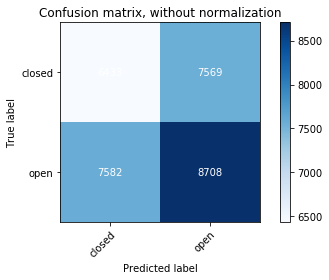

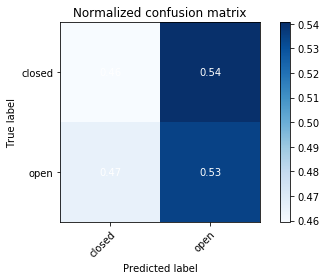

In [32]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_baseline, classes=['closed','open'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_baseline, classes=['closed','open'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [33]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB().fit(X_train_dtm, y_train)

In [34]:
# Make predictions with testing features from X_test
y_pred_class_multi_nb = multi_nb.predict(test_features)

In [35]:
metrics.accuracy_score(y_test, y_pred_class_multi_nb)

0.6610986399049253

In [36]:
# examine class distribution
print(y_test.value_counts())
# there is a majority class of 0 here, hence the classes are skewed

# calculate null accuracy (for multi-class classification problems)
# .head(1) assesses the value 1208
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('Null accuracy:', null_accuracy)

# Manual calculation of null accuracy by always predicting the majority class
print('Manual null accuracy:',(1208 / (1208 + 185)))

open      16290
closed    14002
Name: label, dtype: int64
Null accuracy: open    0.537766
Name: label, dtype: float64
Manual null accuracy: 0.8671931083991385


In [37]:
metrics.confusion_matrix(y_test, y_pred_class_multi_nb)

array([[ 9641,  4361],
       [ 5905, 10385]])

Confusion matrix, without normalization
[[ 9641  4361]
 [ 5905 10385]]
Normalized confusion matrix
[[0.69 0.31]
 [0.36 0.64]]


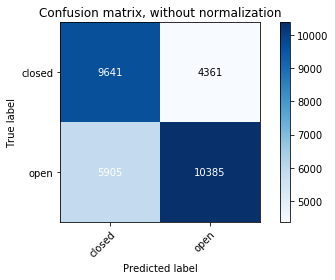

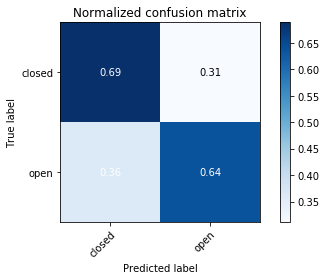

In [38]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_multi_nb, classes=['closed','open'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_class_multi_nb, classes=['closed','open'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [39]:
X_test[y_pred_class_multi_nb > y_test]

2362     School report Merstham Primary School London R...
35965    Dear Parent Lewannick Community Primary School...
26867    Dear Parent Glenmere Community Primary School ...
16512    UntitledShley High School Performing ArtsColle...
13498    Piccadilly Gate Store Street Manchester M WD T...
3030     Piccadilly Gate Store Street Manchester M WD T...
6404     Abacus Pre St Colmans Church Hall St Colmans A...
18905    December Lynne Law Field View Primary School L...
821      October Mrs Leigh Edser Dysart School Ewell Ro...
97       June Greg Sadler Headteacher Howard Middle Sch...
18455    Riverside Primary School St Edmund Way Rainham...
10238    UntitledCrosshall Infant School Unique Referen...
14726    St Peter Church England Fst School Unique Refe...
33732    School report St James School Summer Lane Exet...
34744    Piccadilly Gate Store Street Manchester M WD T...
13643    DAY CARE INSPECTION REPORTURN EY INSPECTION DE...
41757    NURSERY INSPECTION REPORTURN DfES Number INSPE.

In [40]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=10):
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print (class_labels[0], coef, feat)

    print

    for coef, feat in reversed(topn_class2):
        print (class_labels[1], coef, feat)

In [41]:
most_informative_feature_for_binary_classification(count_vect, multi_nb)

closed -2.2823534302296107 provision
closed -2.1183557361637515 children
closed -2.069800776950389 this
closed -1.5132015073509475 well
closed -0.8409228870173546 the
open -0.8409228870173546 the
open -1.5132015073509475 well
open -2.069800776950389 this
open -2.1183557361637515 children
open -2.2823534302296107 provision


In [42]:
len(df_open[df_open['text'].str.contains('good')])

0

In [43]:
df_closed[df_closed['text'].str.contains('a above')]

,school,text,label
11185,URN: EY313561 Closed,© Crown copyright 2009 13910082 W...,closed


In [44]:
df_closed[df_closed['text'].str.contains('aabove')]

,school,text,label


In [45]:
df_closed[df_closed['text'].str.contains('aachen')]

,school,text,label


In [46]:
df_closed[df_closed['text'].str.contains('a chen')]

,school,text,label


In [47]:
aachen = df_closed[df_closed['text'].str.contains('chen')]
print("number of closed documents that contain string 'chen': {}".format(len(aachen)))

number of closed documents that contain string 'chen': 5980


In [48]:
aachen_open = df_open[df_open['text'].str.contains('chen')]
print("number of open documents that contain string 'chen': {}".format(len(aachen_open)))

number of open documents that contain string 'chen': 2218


In [49]:
df_closed[df_closed['text'].str.contains('aadam')]

,school,text,label


In [50]:
df_closed[df_closed['text'].str.contains('a adam')]

,school,text,label


In [51]:
aadam = df_closed[df_closed['text'].str.contains('adam')]
print("number of documents that contain string 'adam': {}".format(len(aadam)))

number of documents that contain string 'adam': 273


In [52]:
aadam_open = df_open[df_open['text'].str.contains('adam')]
print("number of documents that contain string 'adam': {}".format(len(aadam_open)))

number of documents that contain string 'adam': 636


In [53]:
df_closed[df_closed['text'].str.contains('aadear')]

,school,text,label


In [54]:
df_closed[df_closed['text'].str.contains('aah')]

,school,text,label
5975,URN: EY431200 Closed,Inspection date Previous date 14/0...,closed
30685,URN: EY409846 Closed,Inspection date Previous date 25/0...,closed
36357,URN: EY451873 Closed,Inspection date Previous date 13/0...,closed


In [55]:
df_closed[df_closed['text'].str.contains('aal')]

,school,text,label
98,URN: EY246760 Closed,for s provisionUnique Reference Number EY2467...,closed
407,URN: 135238 Closed,for s provisionUnique Reference Number 135238...,closed
1744,URN: 111581 Closed,for s provisionUnique Reference Number 111581...,closed
2559,Brantfield Day Nursery (exempt from registrati...,UntitledKendal Nursery School112091Unique Refe...,closed
4494,URN: 404047 Closed,Untitled for s provision404047Unique Reference...,closed
6974,Greatstone School Nursery (exempt from registr...,UntitledGreatstone Primary School118864Unique ...,closed
12206,Ar Risaalah Nursery Ltd Closed,Ar Risaalah Nursery Ltd Green Heath Sch...,closed
19388,URN: 314829 Closed,Untitled for s provision314829Unique Reference...,closed
23606,Braddock Acorns (exempt from registration sinc...,UntitledBraddock CofE Primary School112023Uniq...,closed
25775,Ar-Risaalah Nursery Closed,"Ar-Risaalah Nursery Basement Part, 69/8...",closed


In [56]:
df_closed[df_closed['text'].str.contains('aalternative')]

,school,text,label


In [57]:
print ("number of closed documents that contain string 'alternative': {}".format(len(df_closed[df_closed['text'].str.contains('alternative')])))

number of closed documents that contain string 'alternative': 2780


In [58]:
print ("number of closed documents that contain string 'alternative': {}".format(len(df_open[df_open['text'].str.contains('alternative')])))

number of closed documents that contain string 'alternative': 7512


In [59]:
df_closed[df_closed['text'].str.contains('aam')]

,school,text,label
1394,Plaistow Jamia Islamia Closed,Emergency report Plaistow Jamia Islamia 16...,closed
25225,Fressingfield Church of England Voluntary Cont...,School report Fressingfield CofE VC Primar...,closed


In [60]:
# Use the `max_features` of CountVectorizer in sklearn to limit to top N features